<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [45]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import neighbors, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline



In [46]:
breast_cancer_csv = '../../DATA/breast-cancer-wisconsin-data.csv'
cancer = pd.read_csv(r"C:\Users\micha\Documents\GitHub\ds-mel-pt-24feb-projects\MichaelPresidente\Data\breast-cancer-wisconsin-data.csv")

### 2. EDA 

Explore dataset. Clean data. Find correlation. 

In [47]:
# Answer
# Are there any missing values
cancer.isna().count()

id                         569
diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
Unnamed:

In [48]:
# Find the 0 values
(cancer == 0).sum().sum()

78

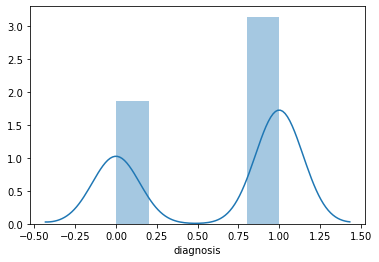

In [49]:
#Is this a Standand Distribution? Plot diagnosis
d_plot = cancer.copy()
d_plot.replace("B",1, inplace = True)
d_plot.replace("M",0, inplace = True)
sns.distplot(d_plot.diagnosis)

### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [50]:
# Replace the B - 1, M - 0 in the main cancer dataset:
cancer.replace("B",1, inplace = True)
cancer.replace("M",0, inplace = True)

In [51]:
# Select Columns and store as arrays
X = cancer.iloc[:, 2:32].values
y = cancer.iloc[:, 1].values

In [52]:
# Standardize the data so that K can be evaluated correctly
X_std = StandardScaler().fit_transform(cancer)

In [53]:
# split data into training and testing sections
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)

In [54]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=456, p=2,
                     weights='uniform')

In [89]:
# There are 30 variables that means 30 possible centroids:
# Use the Error Rate Method to assess the optimal number of centroids
# Adopted from:
# Elbow Method in Supervised Machine Learning(Optimal K Value)
# https://medium.com/@moussadoumbia_90919/elbow-method-in-supervised-learning-optimal-k-value-99d425f229e7


error_rate = []
# Range = the total number of possible variables for this model - 30
for i in range(1,30):
 
 # knn = KNeighborsClassifier(n_neighbors=i)
 knn = neighbors.KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

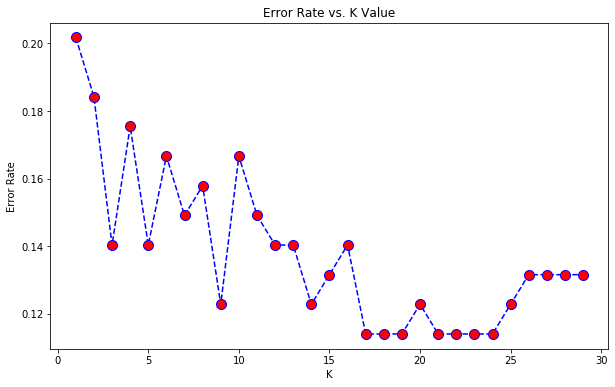

In [91]:
plt.figure(figsize=(10,6))

# *** Note the range must be the same as the one used in Error Rate ****
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### The Error Rate Graph suggests that the optimum clusters is between <br> 17-19 or 22 -25 

In [57]:
# NOW WITH K=30 - our baseline
knn = neighbors.KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
pred = knn.predict(X_train)

In [58]:
print(confusion_matrix(y_train,pred))

[[146  24]
 [  9 276]]


In [59]:
print(classification_report(y_train,pred))

precision    recall  f1-score   support

           0       0.94      0.86      0.90       170
           1       0.92      0.97      0.94       285

    accuracy                           0.93       455
   macro avg       0.93      0.91      0.92       455
weighted avg       0.93      0.93      0.93       455



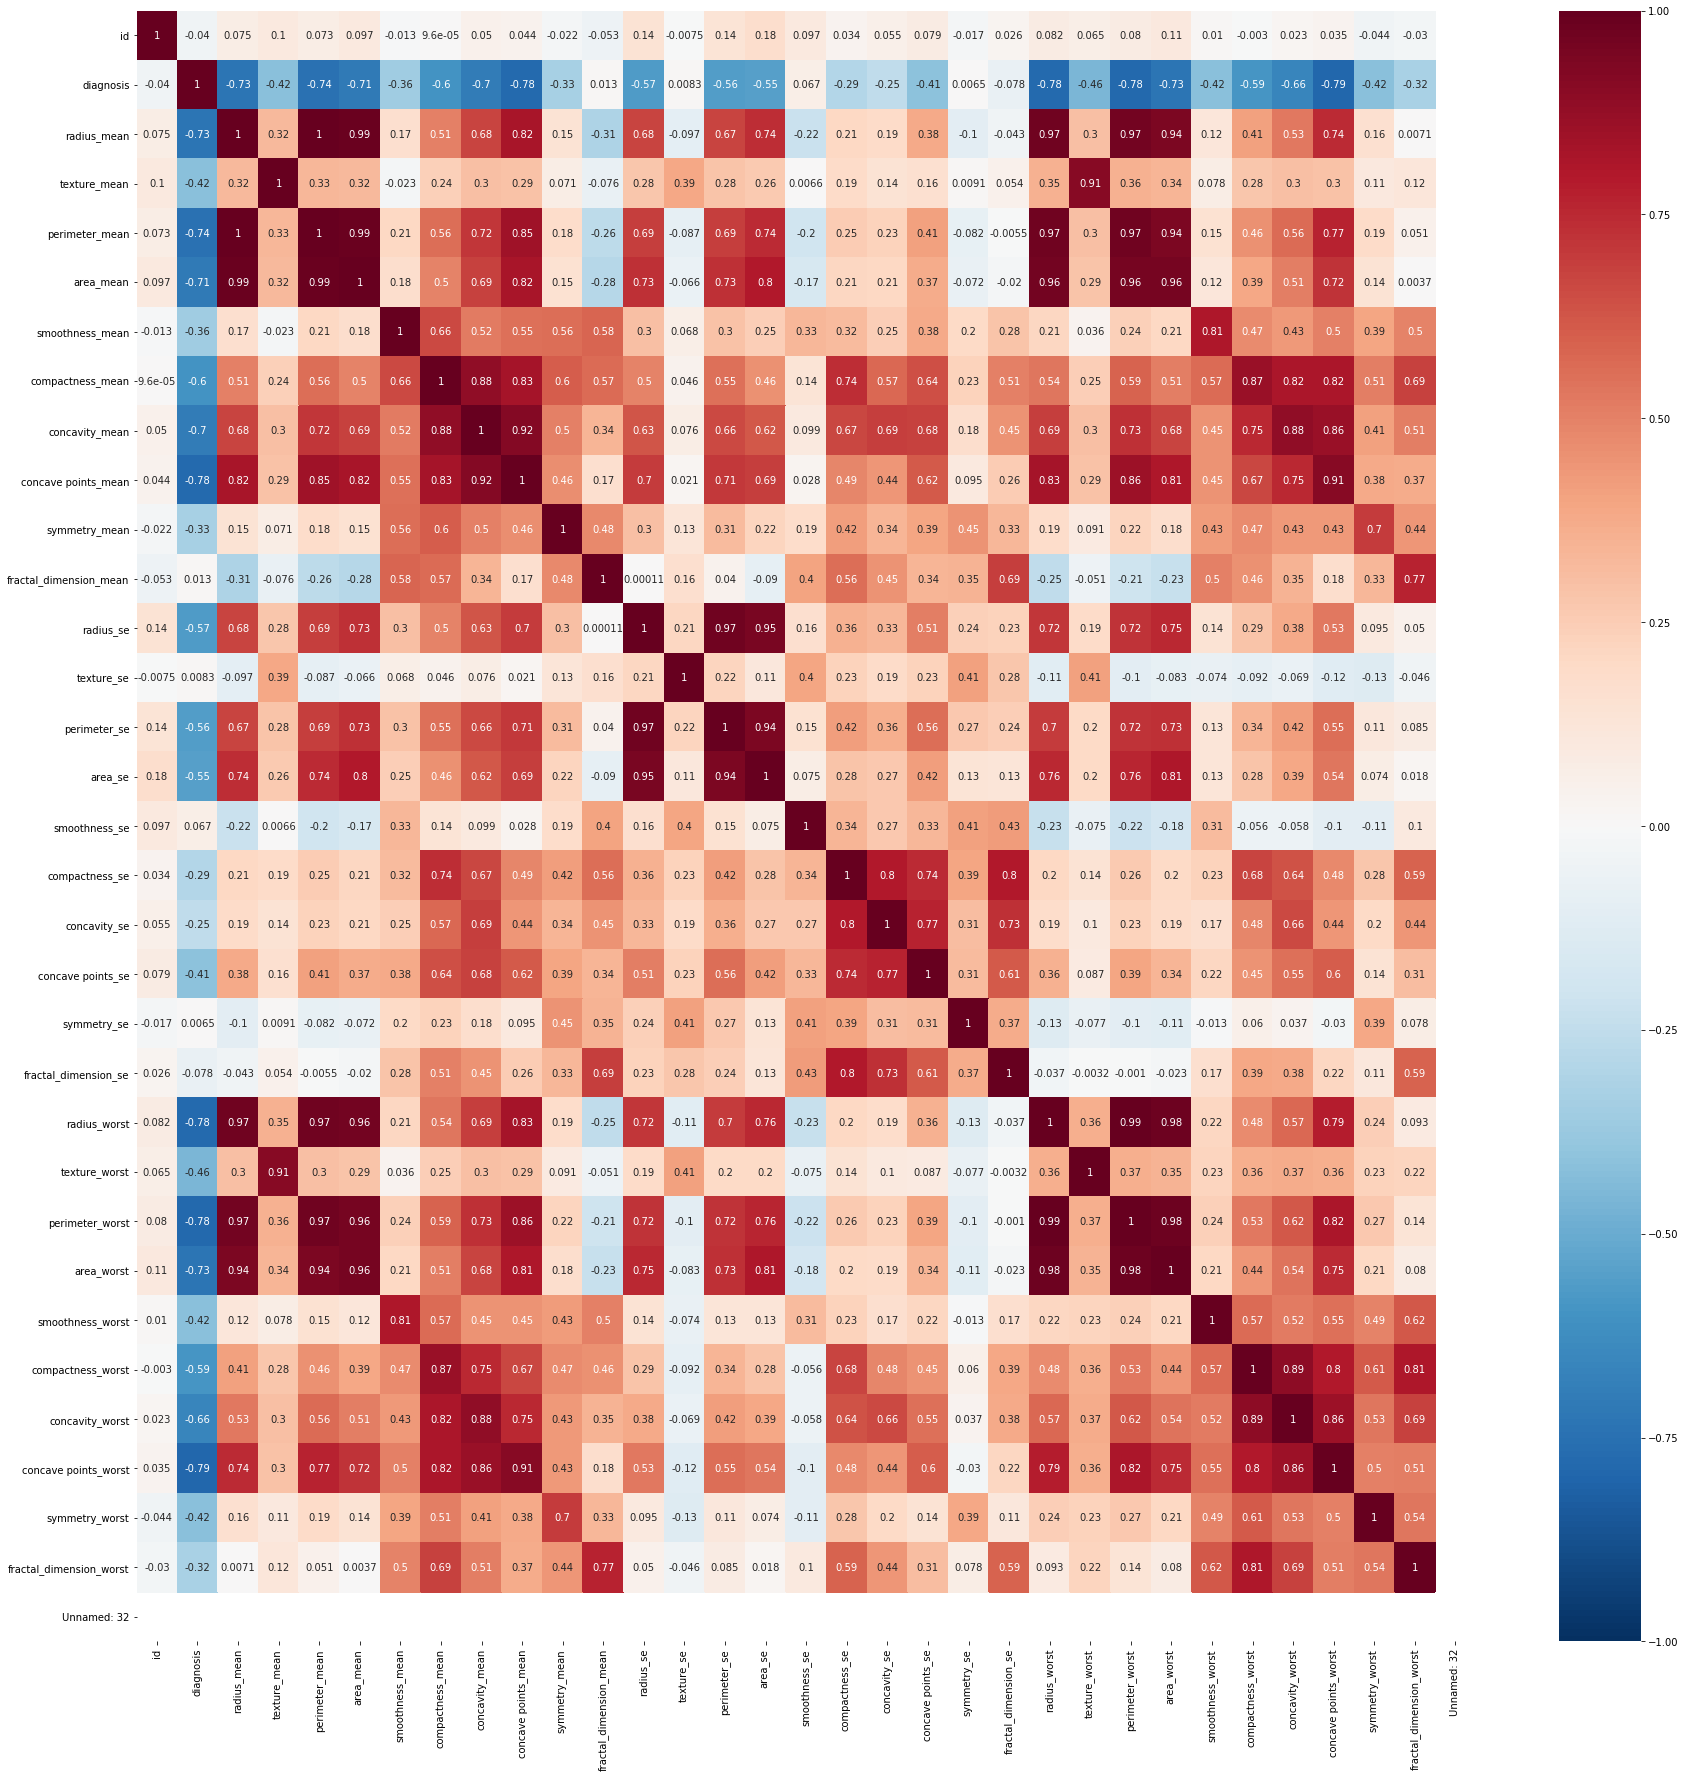

In [60]:
# View the correlation matrix:
corr = cancer.corr()
plt.figure(figsize = (30,30))
heatmap = sns.heatmap(corr, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [61]:
# This is very difficult to read:
# This corrolation matrix can be converted to a dictionary and a list created:

# Adpoted from:
# Quantitative Data Exploration for Regression in Python (Ames Housing Dataset)
# https://medium.com/@hjhuney/quantitative-data-exploration-for-regression-in-python-ames-housing-part-1-25879dd4cc4a

corr_list = sorted(cancer.corr().to_dict()['diagnosis'].items(), key=lambda x: x[1], reverse=True)
corr_list

[('diagnosis', 1.0),
 ('smoothness_se', 0.06701601057948744),
 ('fractal_dimension_mean', 0.012837602698432364),
 ('texture_se', 0.008303332973877434),
 ('symmetry_se', 0.006521755870647959),
 ('id', -0.03976850962171702),
 ('fractal_dimension_se', -0.0779724173902561),
 ('concavity_se', -0.2537297659808306),
 ('compactness_se', -0.2929992442488583),
 ('fractal_dimension_worst', -0.3238721887208239),
 ('symmetry_mean', -0.3304985542625467),
 ('smoothness_mean', -0.3585599650859322),
 ('concave points_se', -0.40804233271650514),
 ('texture_mean', -0.4151852998452046),
 ('symmetry_worst', -0.41629431104861897),
 ('smoothness_worst', -0.4214648610664031),
 ('texture_worst', -0.4569028213967982),
 ('area_se', -0.5482359402780249),
 ('perimeter_se', -0.5561407034314833),
 ('radius_se', -0.5671338208247176),
 ('compactness_worst', -0.5909982378417925),
 ('compactness_mean', -0.5965336775082529),
 ('concavity_worst', -0.6596102103692344),
 ('concavity_mean', -0.6963597071719053),
 ('area_mean

In [62]:
# Save the list to a dataframe
fs_list = pd.DataFrame(corr_list)

In [63]:
# Rename the columns in the feature set dataframe
fs_list.rename(columns = {0:'Attribute',1:'CorrValue'}, inplace=True)

In [64]:
# For Feature selection:
for row in range(0, len(fs_list)):
    icorr = fs_list["CorrValue"].iloc[row]
    if icorr < -0.7:
         print(fs_list["Attribute"].iloc[row])
        # print(fs_list.iloc[row])
         print (fs_list["CorrValue"].iloc[row])

area_mean
-0.7089838365853909
radius_mean
-0.7300285113754569
area_worst
-0.7338250349210516
perimeter_mean
-0.742635529725833
radius_worst
-0.7764537785950388
concave points_mean
-0.7766138400204361
perimeter_worst
-0.782914137173759
concave points_worst
-0.7935660171412696


In [65]:
# ANSWER
# There are 30 variables - the majority are negatively correlated
# Select Columns and store in  new dataframes

# ** Note: Remember 2nd set of brackets for a list of columns
X = cancer[['area_mean', 'radius_mean', 'perimeter_mean']]
y = cancer["diagnosis"]

In [66]:
# split data into training and testing sections
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)

In [67]:
# ANSWER

# initialize our classifier
knn = neighbors.KNeighborsClassifier()

In [68]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [69]:
# Test the model
knn.fit(X_test, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [70]:
def zero_rule_algorithm_classification(train, test):
	output_values = [row[-1] for row in train]
	prediction = max(set(output_values), key=output_values.count)
	predicted = [prediction for i in range(len(train))]
	return predicted


### 4. What is the baseline accuracy?

In [71]:
# calculate the predictor
y_pred = knn.predict(X_test)

In [72]:
print(y_test)

421    1
47     0
292    1
186    0
414    0
      ..
172    0
3      0
68     1
448    1
442    1
Name: diagnosis, Length: 114, dtype: int64


In [73]:
s_plot = X_test.join(y_test,how='outer').copy()
s_plot.replace("B", "Begnin", inplace = True)
s_plot.replace("M", "Malignant", inplace = True)
s_plot.head()

,area_mean,radius_mean,perimeter_mean,diagnosis
421,656.1,14.69,98.22,1
47,534.6,13.17,85.98,0
292,513.7,12.95,83.14,1
186,1041.0,18.31,118.60,0
414,719.5,15.13,96.71,0


In [74]:
sns.scatterplot(
    x='area_mean',
    y='compactness_mean',
    hue='diagnosis',
    data=s_plot)

ValueError: Could not interpret input 'compactness_mean'

In [75]:
plt.scatter(
    X_test['area_mean'],
    X_test['compactness_mean'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.8)

KeyError: 'compactness_mean'

### 5. Choose features to be your predictor variables and set up your X.

In [76]:
# ANSWER

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [77]:
# ANSWER
# Make an instance of a KNeighborsClassifier object with 1 neighbor

# fit on the unstandardized data:

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [78]:
# ANSWER
# predict the response values for the observations in X ("test the model")
# store the predicted response values

### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [79]:
# ANSWER
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)

# STEP 2: train the model on the training set (using K=1)

# STEP 3: test the model on the testing set, and check the accuracy

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [80]:
# ANSWER
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data

# Fit Train Data

# Print accuracy_score

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [81]:
# ANSWER
# plot test accuracy by number of neighbors:

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [82]:
# ANSWER

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [83]:
# ANSWER
# Standarize X

In [84]:
# ANSWER
# plot test accuracy by number of neighbors:

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



